In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

##### Data generation

In [3]:
total_points = 1000
x = tf.random.uniform(shape=[total_points], minval=0, maxval=10)
noise = tf.random.normal(shape=[total_points], mean=0, stddev=1)

In [4]:
x.shape, noise.shape

(TensorShape([1000]), TensorShape([1000]))

In [5]:
k_true = 0.7
b_true = 2.0

In [6]:
y = x * k_true + b_true + noise

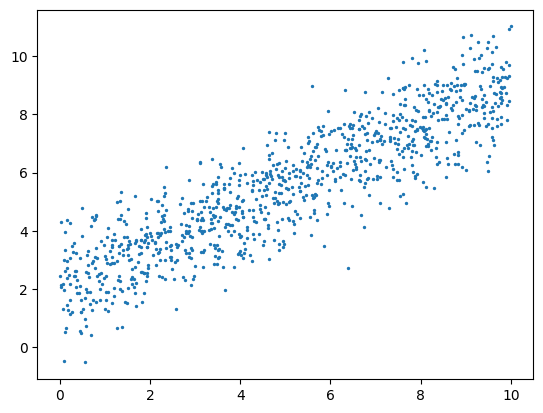

In [9]:
plt.scatter(x, y, s=2);

##### Adam-Implementation

In [10]:
epochs_st = 200
learning_rate = 0.3
batch_size = 100
num_steps = total_points // batch_size

In [11]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

In [15]:
# opt = tf.optimizers.Adam(learning_rate=learning_rate)

In [13]:
eps = 1e-07

betta1 = 0.9
betta2 = 0.999

v_k = 0.
v_b = 0.

s_k = 0.
s_b = 0.

t = 0

for n in range(epochs_st):
    for n_batch in range(num_steps):
        
        y_batch = y[n_batch * batch_size : (n_batch + 1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch + 1) * batch_size]
        
        with tf.GradientTape() as tp:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = tp.gradient(loss, [k, b])   # g
        
        # opt.apply_gradients(zip([dk, db], [k, b]))
        t += 1
        
        v_k = betta1 * v_k + (1 - betta1) * dk
        v_b = betta1 * v_b + (1 - betta1) * db

        v1_k = v_k / (1 - betta1 ** t)
        v1_b = v_b / (1 - betta1 ** t)
        
        s_k = betta2 * s_k + (1 - betta2) * dk ** 2
        s_b = betta2 * s_b + (1 - betta2) * db ** 2

        s1_k = s_k / (1 - betta2 ** t)
        s1_b = s_b / (1 - betta2 ** t)

        u_k = learning_rate * v1_k / (tf.sqrt(s1_k) + eps)
        u_b = learning_rate * v1_b / (tf.sqrt(s1_b) + eps)

        k.assign_sub(u_k)
        b.assign_sub(u_b)

print(k, b, sep='\n')

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6656139492988586>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.011622667312622>


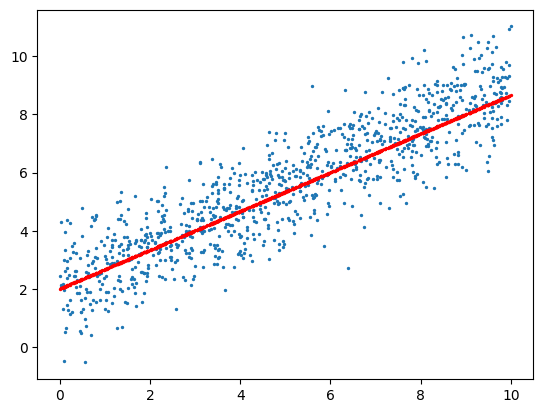

In [14]:
y_pr_sgd_adam = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr_sgd_adam, c='r', s=2);